Commercial buildings produce 60% of greenhouse gas emissions in Canada.   Since 1971, 65635 commercial buildings were built, consisting of 269 million sq/ft of office and warehouse space.   Each one of these buildings produces measurable data that can be used to manage the buildings more efficiently and as a result, reduce greenhouse gasses.   

The process of "recommissioning" a building consists of an intensive measurement of the building operations which aid in assessing and correcting issues that directly affect the efficient operation of a building.   Recommissioning a building is a costly and time-intensive process and as a result, is only undertaken when major construction takes place.

MIT studies show that in as little as five years after construction or recommissioning takes place; the energy consumption is the same or worse as it was prior to any work performed. 

Therefore the need to reduce the cost,  improve the efficiency and the effectiveness of recommissioning buildings is essential to the reduction of GHG. 

With the gathering and analysis of data, I intend to provide a starting point for the effective near real-time operation of a building, ensuring it is operating optimally at all points in time.

Below you will find the examination of the data output from a building with the intent of identifying anomalies that are behaving in a way that is causing the system to be unstable and therefore inefficient. 

In addition to anomaly detection, I will provide a mathematical basis to rank the operation of a building so that the measurement and verification of changes to the structure can be tracked and assessed to assist in the efficient deployment of capital for future upgrades. 



In [1]:
import numpy as np
import pandas as pd
import requests
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans 
from sklearn import metrics 
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from collections import defaultdict
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from sklearn.ensemble import IsolationForest
from sklearn.cluster import SpectralClustering
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib.pyplot import figure
from IPython.display import Image

In [2]:
Hist=pd.read_csv('Historian.csv')

In [3]:
# Rename the columns
Histfx = Hist.rename(index=str, columns={'2':'Analog_1_time', "Unnamed: 1": "Analog_1_value","1000":"Analog_30_time"
                                               ,"Unnamed: 3":"Analog_30_value","Unnamed: 4":"Analog_28_time","Unnamed: 5":"Analog_28_value"
                                               ,"Unnamed: 6":"Analog_24_time","Unnamed: 7":"Analog_24_value","Unnamed: 8":"Analog_29_time"
                                               ,"Unnamed: 9":"Analog_29_value","Unnamed: 10":"Analog_23_time","Unnamed: 11":"Analog_23_value"
                                               ,"Unnamed: 12":"Analog_34_time","Unnamed: 13":"Analog_34_value", "Unnamed: 14":"Analog_33_time"
                                               ,"Unnamed: 15":"Analog_33_value", "Unnamed: 16":"Analog_27_time", "Unnamed: 17":"Analog_27_value"
                                               ,"Unnamed: 18": "Analog_31_time", "Unnamed: 19":"Analog_31_value","Unnamed: 20": "Analog_25_time"
                                               , "Unnamed: 21":"Analog_25_value","Unnamed: 22": "Analog_32_time", "Unnamed: 23":"Analog_32_value"
                                               ,"Unnamed: 24": "Analog_26_time", "Unnamed: 25":"Analog_26_value"  })
# delete three columns 
Histfx.drop(Histfx.index[[0,1,2]], inplace=True)
Histfx.reset_index(inplace=True)

# Ensuring all values are numberic
histnan=Histfx.copy()
histnan=histnan.apply(pd.to_numeric)
histnan.dtypes
histnan.interpolate(method="linear",inplace=True)
histnandrop=histnan.copy()
histnandrop=histnandrop[histnandrop.columns[histnandrop.columns.to_series().str.contains('\w+value')]]
cols = histnandrop.columns

# Correlation Matrix

My first step was to run a simple correlation matrix to identify any items that may be identically or closely correlated.  We can see from the matrix below that # 30 is highly correlated # 29. Also, we see that # 28 and # 26 are highly correlated.

I usual circumstances I would eliminate one of the items that are higly correltaed to oneanother. 

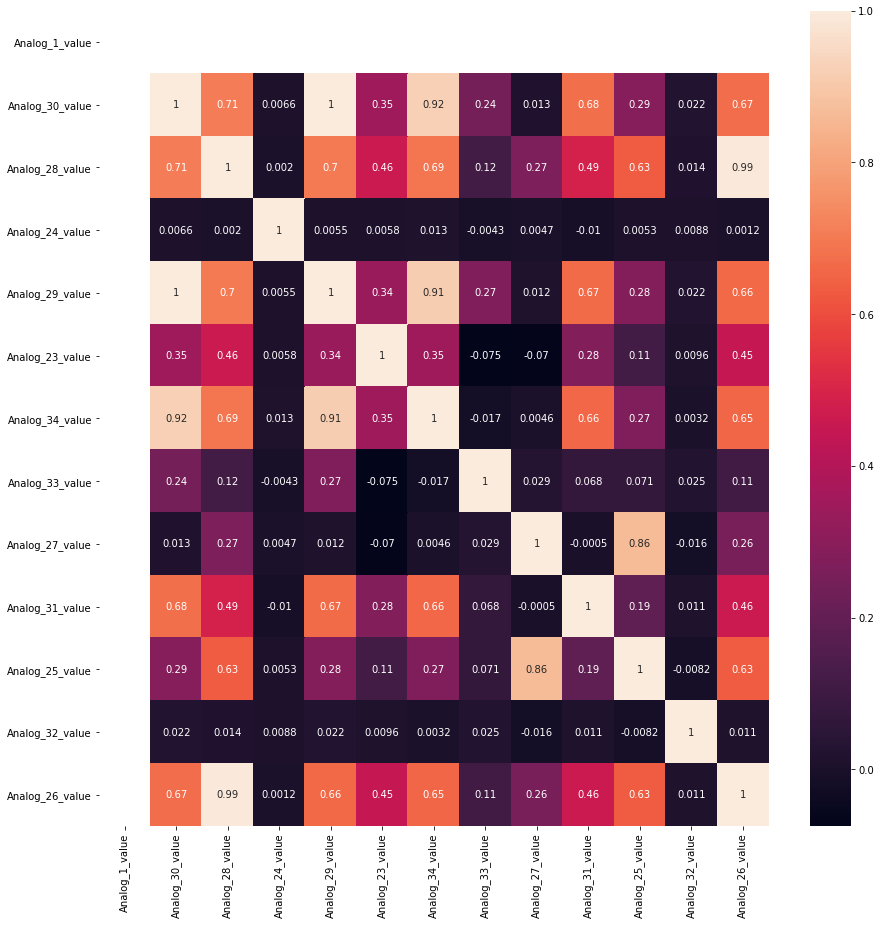

In [4]:
Correlation=histnandrop.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(Correlation,annot=True)

In [ ]:
# Using Standard Scaler to Scale Data
scaler = StandardScaler()
X=scaler.fit_transform(histnandrop) 
histnandrop.shape

(9921, 13)

# tSNE vs PCA for dimensionaly reduction

I can reduce the dimensionality but because I am looking for anomalies, and not looking for prediction accuracy as it pertains to training data(as I am not predicting, I am detecting anomalies).  During this process  I am trying to extract the features that had were the most significant influence over the anomalies I detected using Kmeans or Spectral clustering.   Also, the datasets will be tiny since I will be looking at about 15--20K data points maximum per run. So the computational power requirements will be minimal at first, until training data can accurately aquired through the support for field propoerty maintenance services.  


In [ ]:
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)
target_vals_2 = pd.Series(Kmean.labels_)
X_tsne = TSNE(learning_rate=10).fit_transform(X)
X_tsne200 = TSNE(learning_rate=200).fit_transform(X)
X_tsne500 = TSNE(learning_rate=500).fit_transform(X)
X_pca = PCA(n_components=6).fit_transform(X)
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=target_vals_2 )
plt.title('TSNE Using Learning rate of 10', fontsize=18)
plt.subplot(222)
plt.scatter(X_tsne200[:, 0], X_tsne200[:, 1],c=target_vals_2)
plt.title('TSNE Using Learning rate of 200', fontsize=18)
plt.subplot(223)
plt.scatter(X_tsne500[:, 0], X_tsne500[:, 1],c=target_vals_2)
plt.title('TSNE Using Learning rate of 500', fontsize=18)
plt.subplot(224)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=target_vals_2)
plt.title('PCA',fontsize=18)

# Kmeans, Spectral clustering as real world measurement and verification. 

The intent here is to understand what clustering technique that I will use to determine anomalies in the overall operation of the building, including the source of the disturbances.     The application of this information is two-fold. 

Firstly, in the building management industry, not much, if any, attention is given pro-actively manage the building.  Unfortunately, the pressure for cost-cutting on the operations side has ramped up over the last 5-10 years and as a result building management companies no longer have a certified HVAC/Boiler engineers on hand to keep buildings in "tune."  

So the enormous responsibility for the efficient operation of buildings has been put on building system manufacturers and service providers.  Because the manufacturers of building equipment such as Honeywell, Siemens, York and Johnson Controls have been put under tremendous pressure to keep the cost of the building management systems down, they are mainly selling the systems at below cost and making their money back on mandatory long term service contracts.     

So here is where my product can come in and help.   The buildings are not being managed or monitored for inefficient operations, fundamentally they only respond and service a building if tenants complain.     By detecting anomalies in the building operation, I can detect when the building is working poorly, and also identify what subsystem is out of balance so that it can be re-aligned for harmonious functioning.

Secondly, the previous points aside,  what is also game-changing is that we can have a representative, independent and repeatable measurement and verification technique to measure if the subsystem and hence the overall health of the building. 

The application of clear and concise measurement and verification of building systems not only for the operations side of the building (consisting of about 10% of the cost of the building)  has enormous benefits on the financial side of the equation.  

Building owners are required to keep a percentage of capital set aside to help offset the risk in of failures in the building.  By being able to quantify the quality of the operations empirically, we can better manage the risk profile.  

Quantifying the previously immeasurable "health" measurement (to coin a phrase),  reduces risk and allows companies to free up tens if not hundreds of millions of dollars for other revenue-generating purposes.

I have presented two studies of silhouette scores using Kmeans and Spectral.  I picked these two due to their similarity in terms of geometry. Kmeans is an excellent general clustering algorithm,  Spectral is similar, but works better with smaller datasets and looks for irregularly shaped clusters.  

Due to the nature of my data, each feature represents a building subsystem, I expected Kmeans to perform well due to the physical restrictions of the measurement devices.  The measurements are linear and for the most part, follow a set range, so detecting anomalies may be more accessible as a result.  

I wanted to examine a different methodology of clustering but use a similar geometry, so I selected Spectral as my next choice of clustering technique. Spectral detects more irregularly shaped clusters. As a result, the Silhouette score would reflect how similar a point is is to its cluster.   Because we are looking to divide the data into two clusters (anomalous and normal operation) it performed poorly in this respect as we can see below.   So I decided to use Kmeans as the clustering technique untill training data becomes available. 


# Spectral

In [ ]:
# Spectral Silhouette Score
index_spec = defaultdict(list)
for index in range(2,22,2):
    Spec_Cluster = SpectralClustering(n_clusters=index, assign_labels="discretize", random_state=0).fit(X)
    Spec_Cluster.fit(X)
    target_vals = pd.Series(Spec_Cluster.labels_)
    s_score = silhouette_score(X, target_vals)
    index_spec[index] = s_score

In [ ]:
# Spectral Silhouette Score plot
fig, ax = plt.subplots(figsize=(20, 10))
plt.xticks([2,4,6,8,10,12,14,16,18,20,22])
plt.plot(list(index_spec.keys()), list(index_spec.values()),'o',markersize=12)
plt.xlabel('Number of Clusters',fontsize=18)
plt.ylabel('Silhouette Score',fontsize=18)
plt.title('Spectral Silhouette Score',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

## KMeans

In [ ]:
# Kmeans Silhouette Score
index_kmean = defaultdict(list)
for index in range(2,22,2):
    Kmean = KMeans(n_clusters=index)
    Kmean.fit(X)
    target_vals = pd.Series(Kmean.labels_)
    s_score = silhouette_score(X, target_vals)
    index_kmean[index] = s_score

In [ ]:
# Kmeans Silhouette Score plot
fig, ax = plt.subplots(figsize=(20, 10))
plt.xticks([2,4,6,8,10,12,14,16,18,20,22])
plt.plot(list(index_kmean.keys()), list(index_kmean.values()),'o',markersize=12 )
plt.xlabel('Number of Clusters',fontsize=18)
plt.ylabel('Silhouette Score',fontsize=18)
plt.title('Kmeans Silhouette Score',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Kmeans cluster counts and Extra Trees Classifier. 

Within the immediate context of the data that I have the necessity of trying to detect anything more than anomalous data vs normal data at this point is futile due to the absence of training data.  At this point, I will need to confirm with system engineers that there is a problem, identify the anomaly pattern and train/test to detect a specific of the issue. 

There are two essential ideas to be extracted here. 

Firstly we need to understand in those future iterations of the examination of the data, and the building may be operating in more than two modes, (anomalous and non-anomalous states).  
 
Below you will find a graph that illustrates the relative feature importance as the number of clusters increases.  As we can see, the features begin to stabilize at 6 clusters.   This stabilization may be an early indication that the building is running in multiple modes (day, night, weekend, occupied, not occupied) and will need to be investigated at a later date when training data becomes available. 

After contrasting and comparing the specific clustering techniques and identifying the nominal clustering technique, I wanted to try and confirm the idea of false positives.  Without training data, this leaves me with the examination of the ratio of targeted vs non-targeted responses.    

In this case, we have aprox. 1100 out of 9921 observations.  This ratio is by no means conclusive, but it does indicate that a good portion of the time the building is running in a mode other than what is detected as an anomaly by the Kmeans algorithm.   

Until I can confirm with the building engineers, we will focus on the targeted data and examine it further in the section under the Ranked Anomalies for individual features section.   

Secondly, I examined the data using extra trees classifier using the specific function of feature ranking.    This function outputs the features that had the most significant impact on the anomalies identified using Kmeans.  

Each feature in the dataset represents a specific measurement for building subsystem ( a/c, pump, outside air temperature, boiler pressure, etc.). The ability to quantify and rank probabilities as to what may be the source of the anomaly/malfunctions in a system is a quantum shift in the methodology used to fix buildings.  

Current diagnostic tools only examine the current state, and what is often the problem is by the time the technician reaches the site, the problem has gone away or diminished in a way that the root cause of the problem is no longer evident.  Improperly diagnosed root causes precipitate inadequate solutions which often exaggerates the inefficiency and problems with a building. 

With the ExtraTreesClassifier, I changed the number of estimators from 100-300 with very little change in the top three.  For the purposes of this exercise, we are trying to identify contributing factors to building stability; it is clear that the Analog 30, 34, 29 and 28 are having the most significant influence on building anomalies.   Changing the number of classifiers shifts the arrangement nominally but ultimately provides a good list of initial targets to start with.  


In [ ]:
# Loop through kmeans using 2-12 clusters, default estimators set to 100

index_dict = defaultdict(list)
index_fi = defaultdict(list)
for index in range(2,12,2):
    Kmean = KMeans(n_clusters=index)
    Kmean.fit(X)
    target_vals = pd.Series(Kmean.labels_)
    y = target_vals
    
    clf=ExtraTreesClassifier(n_estimators=100,
                              random_state=0)
    clf = clf.fit(X,y)
    importances = clf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]
    index_fi[index] = np.sort(importances)[::-1]
    index_dict[index]=indices

In [ ]:
# Create a dict with the values to plot.
new_dict = defaultdict(list)
for k in range(0,13):
    for val in list(index_dict.keys()):
        pos = np.where(index_dict[val]==k) # Index position for value equal to k
        new_dict[k].append(12-pos[0][0])
        

In [ ]:
# Plot the new_dict
clust_size = [2,4,6,8,10]
plt.figure(figsize=(20,15))
for val in list(range(1,11)):
    plt.plot(clust_size, new_dict[val], 'o-', markersize=12)
    plt.xticks([2,4,6,8,10])
    plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12])
    plt.title("Feature Score vs number of Kmeans clusters", fontsize=18)
    plt.xlabel('Number of Clusters',fontsize=18)
    plt.ylabel('Feature Importance Ranking (Higest to Lowest)',fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
plt.legend(['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6' , 'Feature 7', 'Feature 8', 
           'Feature 9', 'Feature 10', 'Feature 11', 'Feature 12'], bbox_to_anchor=(1.04,1), loc="upper left")

In [ ]:
#Plotting theimportance of features based on 2 clusters. 
column_names = histnandrop.columns
plt.figure(figsize=(20,15))
plt.bar(column_names[index_dict[2]],  index_fi[2])
plt.xlabel('Feature Name', fontsize=18)
plt.ylabel('Feature Importance Ranking (Percentage of importance)',fontsize=18)
plt.title('Importance Score of Features using 2 clusters', fontsize=18)
plt.xticks(rotation=90, fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
cols_order = column_names[index_dict[2]]

# Ranked analysis looking for Anomolies for Individual Features

In the code below I selected an contamination threshold of .1 as a starting point.  My intent is to higlight the outliers within the data.  The highlighting of the outlers, coupled with the ranked approach to the output of the graphs will help to direct an investigation as to a potential problem.  This threshold can be revisited after we recieve feedback and assemble training data. 

Below I examine each feature individually to help identify anomalies that have been identified by the isolation forest classifier algorithm.   I have ranked the output to reflect our findings in the first section. 

What we see below is a promising example of anomalous behaviour detection.  As we can see by the red dots on the graph we as well as the section circled below the unusual behaviour of the feature,  it clearly shows an undulating action in the circled portion where the values are bouncing quickly back and forth in a given range.  The two cases features below we can see the process that I used has identified a potental anomomly, and ranked it as the most influencial feature out of all data that has been identified as anomalous. 

This is by no means a definitive answer as to something being wrong, but the inital results look promising. 


![title](Rank1.png)

We see a another event happening at aproximately the same time, with a a smilar look to the first one.  By the shape of the graph there is a strong indication of abnormal behavior.  

![title](Rank2.png)

This third example is less conclusive but does offer some insight to what may be happening in the building. The small movements in the overall trend of the line may indicate that the value is expierening interference of some kind, or perhaps the sensor measuring the device is becoming unstable.  In either case it is hightly ranked and may be a leading indicator for failure.  A review of the findings may help to shed light on the root cause of the disturbance. 

![title](Rank3.png)

In [ ]:
# Finding Anomalies by columns outliers faction of 0.1 

outliers_fraction=0.1
for index, col_name in enumerate(cols_order):
    X_slice = histnan.loc[:,['Analog_1_time', col_name]]
    np_scaled = scaler.fit_transform(X_slice)
    data = pd.DataFrame(np_scaled)
    model =  IsolationForest(contamination=outliers_fraction)
    model.fit(data) 
    X_slice['anomaly2'] = pd.Series(model.predict(data))
    fig, ax = plt.subplots(figsize=(15,10))
    a = X_slice.loc[X_slice['anomaly2'] == -1, ['Analog_1_time',col_name]]
    ax.plot(X_slice['Analog_1_time'], X_slice[col_name], color='blue', label = 'Normal')
    ax.scatter(a['Analog_1_time'],a[col_name], color='red', label='Anomaly')
    plt.xlabel('Time(EPOC) 15 Min Resolution', fontsize=18)
    plt.ylabel('Value', fontsize=18)
    plt.title(col_name, fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
    plt.legend()

# Conclusion 

In conclusion, identifying abnormal behaviour in a system, be it a building or a website or a bank account is a challenging undertaking.  How we select and deploy algorithms is overwhelming at times.   

I have tried to avoid biases when examining the data set, but as much I as work, I cannot eliminate them entirely.  I do have experience in this field, and many of the charts do show what appears as problems with the system.  Devices are not built, nor systems designed,  to bounce back and forth at a high rate over a short period.   The service load is high, and will ultimately cause a failure of some sort.   

Exploring the importance and impacts of scaling techniques,  cluster sizes as well as examining the inputs visually has provided a good foundation for anomaly detection. 

However, this is only the first step in a long process.  I will have to take the data to the system engineers and building managers to help identify the specific problem or process that caused the unusual behaviour. 

Thanks again Boris, for all your help over what feels like a marathon of data science learning.  It has provided me with the necessary underpinnings to build upon as I move forward with my Data Science studies.    